# Analyse the AW shape in CREG025.L75 experiments

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from netCDF4 import Dataset
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap
from fsspec.implementations.local import LocalFileSystem
fs = LocalFileSystem()

%matplotlib inline

>> Function definition START

In [2]:
def Arc_Bat(ztype='isol1000') :

        locpath='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG12.L75/GRID/'
        locfile='bathymetry_CREG12_V3.3_CT20180612Larger_ct20190102.nc'
        fieldbat=Dataset(locpath+locfile)
        lon  = np.squeeze(fieldbat.variables['nav_lon'])
        lat  = np.squeeze(fieldbat.variables['nav_lat'])
        My_var = np.squeeze(fieldbat.variables['Bathymetry'])

        spval = 0.
        My_var= np.ma.masked_where(My_var <= spval,My_var)

        if ztype == 'isol1000' :
                vmin=1000. ; vmax=2000.
                contours=[1000.]
                limits=[vmin,vmax]
                myticks=[1000.]
        elif ztype == 'isol1500' :
                vmin=1500. ; vmax=2000.
                contours=[1500.]
                limits=[vmin,vmax]
                myticks=[1500.]
        elif ztype == 'isomonarc' :
                vmin=500. ; vmax=4000.
                contours=[500.,2000.,4000.]
                limits=[vmin,vmax]
                myticks=[500.,2000.,4000.]
        elif ztype == 'isol500' :
                vmin=500. ; vmax=500.
                contours=[500.]
                limits=[vmin,vmax]
                myticks=[500.]
        else:
                vmin=0. ; vmax=8000.
                contours=[100.,500.,1000.,2000.,3000.,3500.,4000.]
                limits=[vmin,vmax]
                myticks=[100.,500.,1000.,2000.,3000.,3500.,4000.]

        #
        #rcParams['text.latex.unicode']=True
        plt.rcParams['contour.negative_linestyle'] = 'solid'
        #
        m = Basemap(projection='npstere',boundinglat=65,lon_0=-60, resolution='i')
        norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
        pal = plt.cm.get_cmap('binary')
        X,Y = m(lon,lat)

        # contour (optional)
        CS2 = m.contour(X, Y, My_var, linewidths=0.5,levels=contours, colors='black', alpha=1.)
        plt.clabel(CS2, CS2.levels, inline=True, fmt='%.0f', fontsize=3)

        return m, X, Y


In [3]:
def Arc_plot(lon,lat,tab,contours,limits,myticks=None,name=None,zmy_cblab=None,zmy_cmap=None,filename='test.pdf',zvar=None):
        #
# Les 2 lignes suivantes posent un probleme a l'execution lie a LaTex ....
#       rcParams['text.usetex']=True
#       rcParams['text.latex.unicode']=True
        #rcParams['font.family']='serif'

        plt.rcParams['contour.negative_linestyle'] = 'solid'
        #
        m = Basemap(projection='npstere',boundinglat=65,lon_0=-60, resolution='i')

        if zvar == 'sivolu' or zvar == 'siconc'  or zvar == 'ssh' or zvar == 'socurl' :
                zfontsize=10.
        else:
                zfontsize=6.

        if zvar != 'Bathy' :
                m.drawparallels(np.arange(-90.,91.,5.),labels=[False,False,False,False], size=zfontsize, linewidth=0.3)
                m.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True], size=zfontsize, latmax=90.,linewidth=0.3)
                m.fillcontinents(color='grey',lake_color='white')

        norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])

        if zmy_cmap != None :
                pal = zmy_cmap
        else:
                pal = plt.cm.get_cmap('coolwarm')
                #pal = plt.cm.get_cmap('terrain')

        X,Y = m(lon,lat)
        C = m.contourf(X,Y,tab,contours,cmap=pal,norm=norm,extend='both')
        if zvar == 'ssh':
                CS=m.contour(X, Y, tab, linewidths=0.5, levels=npy.arange(limits[0],limits[1],5.), colors='k', alpha=0.4)

        ############################################################################################################
        ############################################################################################################
        moorplot=1
        if moorplot == 1 :
                bx_ARCB={'name':'B'  ,'lon_min':-150.,'lon_max':-150.,'lat_min':78.,'lat_max':78.}
                bx_ARCM={'name':'M1' ,'lon_min': 125.,'lon_max': 125.,'lat_min':78.,'lat_max':78.}
                bx_EURA={'name':'EUR','lon_min':  60.,'lon_max':  60.,'lat_min':85.,'lat_max':85.}

                All_box=[bx_ARCB,bx_EURA]
                for box in All_box:
                        lats = [box['lat_min'],box['lat_max']]
                        lons = [box['lon_min'],box['lon_max']]
                        x,y = m(lons,lats)
                        m.scatter(x,y,3,marker='o', color='r')
                        #m.plot(x,y,linewidth=2, color='g')
        ############################################################################################################
        ############################################################################################################

        # colorbar      
        if myticks is None:
                cbar = plt.colorbar(C,format='%.2f',orientation='vertical',shrink=0.8)
        else:
                if zvar == 'votemper' or zvar == 'vosaline' or zvar == 'sivolu' :
                        cbar = plt.colorbar(C,format='%.2f',orientation='vertical',shrink=0.8,drawedges=True)
                else:
                        cbar = plt.colorbar(C,format='%.0f',orientation='vertical',shrink=0.8,drawedges=True)

                cbar.set_label(zmy_cblab,fontsize=zfontsize)
                cl = plt.getp(cbar.ax, 'ymajorticklabels')
                plt.setp(cl, fontsize=zfontsize)

        plt.title(name,fontsize=zfontsize)

        return

In [21]:
def awtmax_depth (temp,sal,zdim,deptht,ztime=None, zmask=None):
    #%%time 
    if ztime != None : 
        elmask = (sal > 33.5) 
    ztemp = temp.where(mask)

    #%%time 
    temp_filled = (ztemp.fillna(-10)).compute() #replace nans with absurd temperature values
    depth_map = temp_filled.argmax(dim=zdim,skipna=True) 
    temp_map = temp_filled.max(dim=zdim,skipna=True)

    temp_map=temp_map.where(temp_map != -10)
    depth_map=depth_map.where(depth_map != -10)
    print(zmask.shape)
    if zmask.any != None : depth_map=depth_map.where(zmask != 0)
    
    # Need to get now the true depth, not the index
    ind_awdepth=np.int32(depth_map)
    new_depth=[]
    for it in ind_awdepth.flat:
        if it < 0 :
            new_depth.append(-999)
        else:
            new_depth.append(deptht[it])

    true_depth=np.array(new_depth)
    true_depth=np.where(true_depth == -999,np.nan, true_depth)
    # Hard coded dimensions of the CREG12.L75 configuration 
    #reshape_true_depth=np.reshape(true_depth,(1801, 1580))
    # Hard coded dimensions of the CREG025.L75 configuration 
    if ztime != None : 
        reshape_true_depth=np.reshape(true_depth,(ztime,603, 528))
        # Transform the numpy array into a data array
        final_true_depth=xr.DataArray(reshape_true_depth,dims=['time_counter','y','x'])
    else: 
        reshape_true_depth=np.reshape(true_depth,(603, 528))
        # Transform the numpy array into a data array
        final_true_depth=xr.DataArray(reshape_true_depth,dims=['y','x'])

    
    return temp_map, final_true_depth

>> Function definition END

# CREG025.L75  Grid

In [5]:
GRIDPATH='/home1/scratch/ctalandi/CREG025.L75/CREG025.L75-I/'
ds_grd=xr.open_dataset(GRIDPATH+'CREG025.L75_byte_mask.nc')
ds_grd
tmask2D=ds_grd['tmask'].isel(z=0,t=0)

# CREG025.L75  Bathymetry

In [6]:
locpath='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/GRID/'
locfile='CREG025.L75_domain_cfg.nc'
fieldbat=xr.open_dataset(locpath+locfile)

# Read the initial state based on WOA09

In [6]:
PATHIN='/home1/scratch/ctalandi/CREG025.L75/CREG025.L75-I/'
ds_woa09=xr.open_dataset(PATHIN+'CREG025.L75-BCTGE27NTMX_init_gridT.nc')

vosaline=ds_woa09['vosaline'].isel(time_counter=0)
votemper=ds_woa09['votemper'].isel(time_counter=0)

In [7]:
ds_woa09

<xarray.Dataset>
Dimensions:       (y: 603, x: 528, deptht: 75, ncatice: 5, time_counter: 1)
Coordinates:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
  * deptht        (deptht) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * ncatice       (ncatice) float32 1.0 2.0 3.0 4.0 5.0
  * time_counter  (time_counter) object 1959-01-01 00:12:00
Dimensions without coordinates: y, x
Data variables: (12/39)
    vosaline      (time_counter, deptht, y, x) float32 ...
    votemper      (time_counter, deptht, y, x) float32 ...
    vosigma0      (time_counter, deptht, y, x) float32 ...
    sossheig      (time_counter, y, x) float32 ...
    vozocrtx      (time_counter, deptht, y, x) float32 ...
    vomecrty      (time_counter, deptht, y, x) float32 ...
    ...            ...
    sithicat      (time_counter, ncatice, y, x) float32 ...
    siconcat      (time_counter, ncatice, y, x) float32 ...
    sisalcat      (time_counter, ncatice, y, x) float32 ...
    sitemcat      (time_counter, ncatice, y, x) float32 ...
    snthicat      (time_counter, ncatice, y, x) float32 ...
    sntemcat      (time_counter, ncatice, y, x) float32 ...
Attributes:
    Conventions:  CF-1.1
    production:   An IPSL model
    TimeStamp:    20/02/2018 15:38:59 -0000
    file_name:    output.init.nc

# Compute the corresponding AWTmax & depth 

In [10]:
temp_map, depth_map = awtmax_depth(votemper,vosaline,'deptht',np.array(ds_woa09['deptht']),zmask=tmask2D)

(603, 528)


/home1/datawork/ctalandi/conda-env/Jupyter-Dask/lib/python3.11/site-packages/xarray/core/common.py:165: RuntimeWarning: invalid value encountered in cast
  return np.asarray(self.values, dtype=dtype)


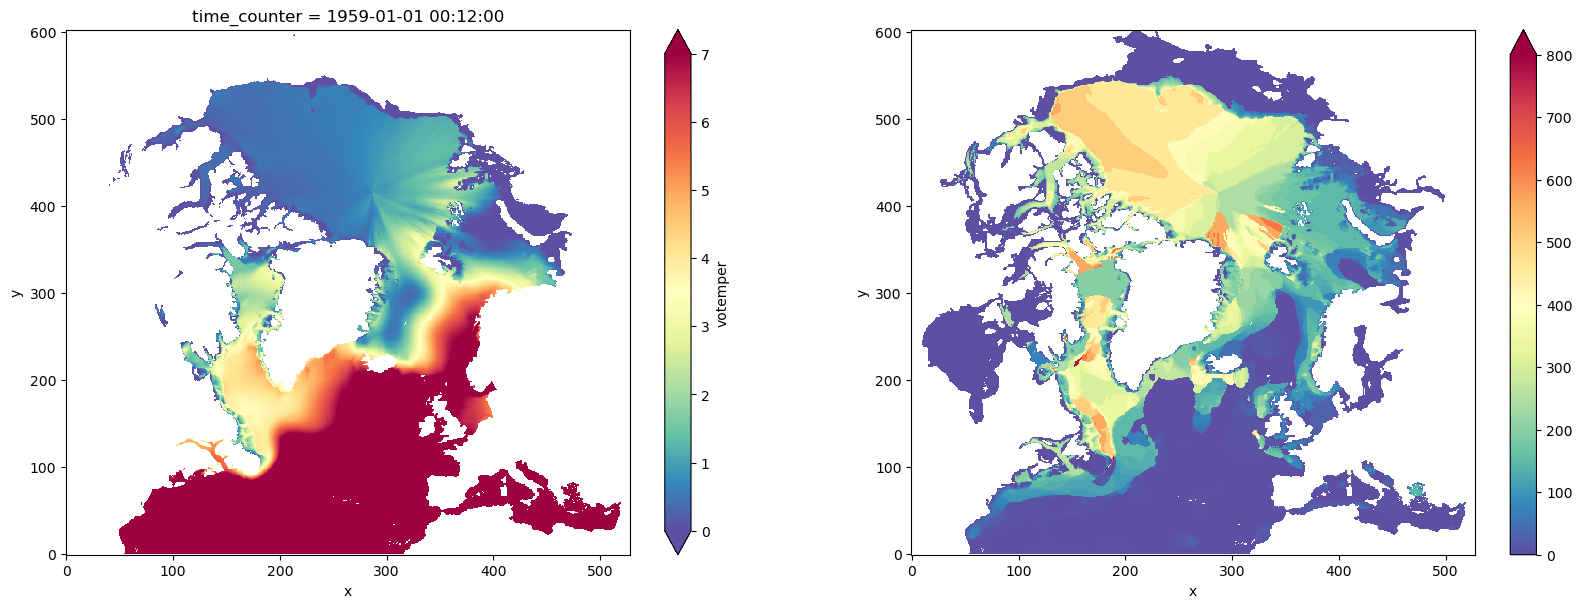

In [11]:
plt.figure(figsize=(20,15))
plt.subplot(221)
temp_map.plot(cmap='Spectral_r',vmin=0.,vmax=7.)
plt.subplot(222)
depth_map.plot(cmap='Spectral_r',vmin=0.,vmax=800.)

# Read input Data processed by the Arctic Monitoring

In [11]:
# Define a function used to clean data from the Monitoring 
def clean_AM_AWtmax_depth(fldtoclean,tmask2D):
    fldtoclean=xr.where(tmask2D==0., np.nan,fldtoclean)
    fldtoclean=xr.where(fldtoclean >=999., np.nan,fldtoclean)
    return fldtoclean

# Read the full years input Data processed by the Arctic Monitoring

In [47]:
CASE='DFS52NEM405'
#CASE='ERA01NEM405'
DATA_PATH='/home1/datahome/ctalandi/RUNS/RUN_CREG025.L75/CREG025.L75-ERA01/CTL/CDF/MONARC/MAPS/NCDF-CREG025.L75/CREG025.L75-'+CASE+'/'
from fsspec.implementations.local import LocalFileSystem
fs = LocalFileSystem()
AW_files = [f for f in fs.glob(DATA_PATH+'CREG025.L75-'+CASE+'_AWTmaxClim_y*.nc')]
AW_files                           

['/home1/datahome/ctalandi/RUNS/RUN_CREG025.L75/CREG025.L75-ERA01/CTL/CDF/MONARC/MAPS/NCDF-CREG025.L75/CREG025.L75-DFS52NEM405/CREG025.L75-DFS52NEM405_AWTmaxClim_y1979.nc',
 '/home1/datahome/ctalandi/RUNS/RUN_CREG025.L75/CREG025.L75-ERA01/CTL/CDF/MONARC/MAPS/NCDF-CREG025.L75/CREG025.L75-DFS52NEM405/CREG025.L75-DFS52NEM405_AWTmaxClim_y1980.nc',
 '/home1/datahome/ctalandi/RUNS/RUN_CREG025.L75/CREG025.L75-ERA01/CTL/CDF/MONARC/MAPS/NCDF-CREG025.L75/CREG025.L75-DFS52NEM405/CREG025.L75-DFS52NEM405_AWTmaxClim_y1981.nc',
 '/home1/datahome/ctalandi/RUNS/RUN_CREG025.L75/CREG025.L75-ERA01/CTL/CDF/MONARC/MAPS/NCDF-CREG025.L75/CREG025.L75-DFS52NEM405/CREG025.L75-DFS52NEM405_AWTmaxClim_y1982.nc',
 '/home1/datahome/ctalandi/RUNS/RUN_CREG025.L75/CREG025.L75-ERA01/CTL/CDF/MONARC/MAPS/NCDF-CREG025.L75/CREG025.L75-DFS52NEM405/CREG025.L75-DFS52NEM405_AWTmaxClim_y1983.nc',
 '/home1/datahome/ctalandi/RUNS/RUN_CREG025.L75/CREG025.L75-ERA01/CTL/CDF/MONARC/MAPS/NCDF-CREG025.L75/CREG025.L75-DFS52NEM405/CREG025.

In [48]:
# Read like this when there is no time axis in Netcdf file
ds_AW = xr.concat([xr.open_dataset(f) for f in fs.glob(DATA_PATH+'CREG025.L75-'+CASE+'_AWTmaxClim_y*.nc')],dim='time_counter')
ds_AW

<xarray.Dataset>
Dimensions:           (time_counter: 12, y: 603, x: 528, yobs: 180, xobs: 360)
Dimensions without coordinates: time_counter, y, x, yobs, xobs
Data variables:
    AWTmax_mod        (time_counter, y, x) float32 9.969e+36 ... 9.969e+36
    AWTmax_init       (time_counter, yobs, xobs) float32 9.969e+36 ... 0.7171
    AWTmaxDepth_mod   (time_counter, y, x) float32 9.969e+36 ... 9.969e+36
    AWTmaxDepth_init  (time_counter, yobs, xobs) float32 9.969e+36 ... 400.0
    lat_obs           (time_counter, yobs, xobs) float32 -89.5 -89.5 ... 89.5
    lon_obs           (time_counter, yobs, xobs) float32 0.5 1.5 ... 358.5 359.5
    lat_mod           (time_counter, y, x) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    lon_mod           (time_counter, y, x) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    description:  Diagnostics has been calculated using the Arctic monitoring...
    date:         Mon Sep  9 15:57:38 GMT 2024\n

In [49]:
new_time=pd.date_range(start='1979-07',end='1990-07',periods=12,normalize=True)
new_time

DatetimeIndex([          '1979-07-01 00:00:00',
               '1980-06-30 06:32:43.636363636',
               '1981-06-30 13:05:27.272727272',
               '1982-06-30 19:38:10.909090912',
               '1983-07-01 02:10:54.545454544',
               '1984-06-30 08:43:38.181818176',
               '1985-06-30 15:16:21.818181824',
               '1986-06-30 21:49:05.454545440',
               '1987-07-01 04:21:49.090909088',
               '1988-06-30 10:54:32.727272736',
               '1989-06-30 17:27:16.363636352',
                         '1990-07-01 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [50]:
ds_AW=ds_AW.assign_coords({'time_counter':new_time})
ds_AW

<xarray.Dataset>
Dimensions:           (time_counter: 12, y: 603, x: 528, yobs: 180, xobs: 360)
Coordinates:
  * time_counter      (time_counter) datetime64[ns] 1979-07-01 ... 1990-07-01
Dimensions without coordinates: y, x, yobs, xobs
Data variables:
    AWTmax_mod        (time_counter, y, x) float32 9.969e+36 ... 9.969e+36
    AWTmax_init       (time_counter, yobs, xobs) float32 9.969e+36 ... 0.7171
    AWTmaxDepth_mod   (time_counter, y, x) float32 9.969e+36 ... 9.969e+36
    AWTmaxDepth_init  (time_counter, yobs, xobs) float32 9.969e+36 ... 400.0
    lat_obs           (time_counter, yobs, xobs) float32 -89.5 -89.5 ... 89.5
    lon_obs           (time_counter, yobs, xobs) float32 0.5 1.5 ... 358.5 359.5
    lat_mod           (time_counter, y, x) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    lon_mod           (time_counter, y, x) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    description:  Diagnostics has been calculated using the Arctic monitoring...
    date:         Mon Sep  9 15:57:38 GMT 2024\n

In [51]:
# Make 2D diff between year & year-1 
Diff_AWTmaxDepth_mod=ds_AW.AWTmaxDepth_mod-ds_AW.AWTmaxDepth_mod.roll(time_counter=+1)
Diff_AWTmaxDepth_mod

<xarray.DataArray 'AWTmaxDepth_mod' (time_counter: 12, y: 603, x: 528)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1979-07-01 ... 1990-07-01
Dimensions without coordinates: y, x

In [53]:
clean_Diff_AWTmaxDepth_mod=clean_AM_AWtmax_depth(Diff_AWTmaxDepth_mod,tmask2D)

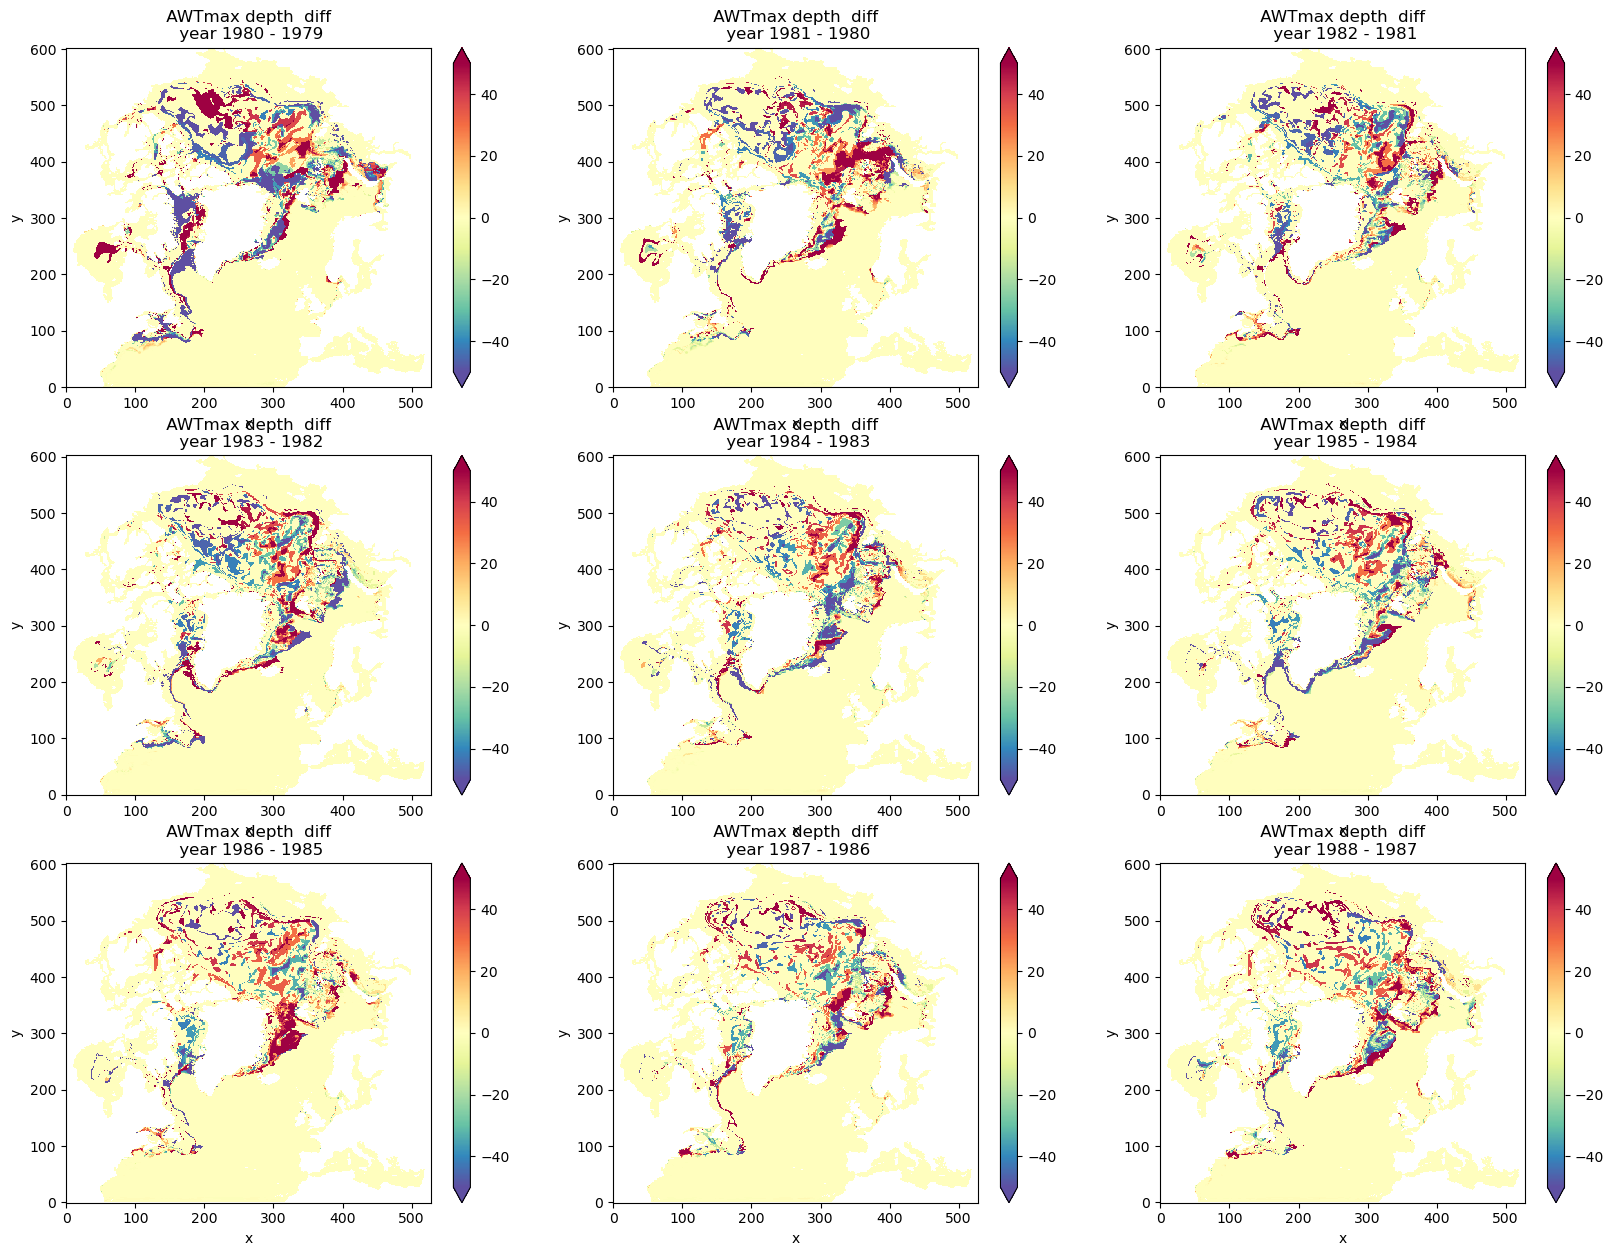

In [54]:
plt.figure(figsize=(20,15))
y_start=1980
for iter in np.arange(9):
    plt.subplot(331+iter)
    clean_Diff_AWTmaxDepth_mod.sel(time_counter=str(y_start+iter)).plot(cmap='Spectral_r',vmin=-50.,vmax=50.)
    plt.title(' AWTmax depth  diff \n'+' year '+str(y_start+iter)+' - '+str(y_start+iter-1))

# Clean projection of the AWTmaxDepth difference by year

/dev/shm/pbs.489344.datarmor0/ipykernel_48708/768119356.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pal = plt.cm.get_cmap('binary')
/dev/shm/pbs.489344.datarmor0/ipykernel_48708/768119356.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pal = plt.cm.get_cmap('binary')
/dev/shm/pbs.489344.datarmor0/ipykernel_48708/768119356.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pal = plt.cm.get_cmap('binary')
/dev/shm/pbs.489344.datarmor0/ipykernel_48708/768119356.py

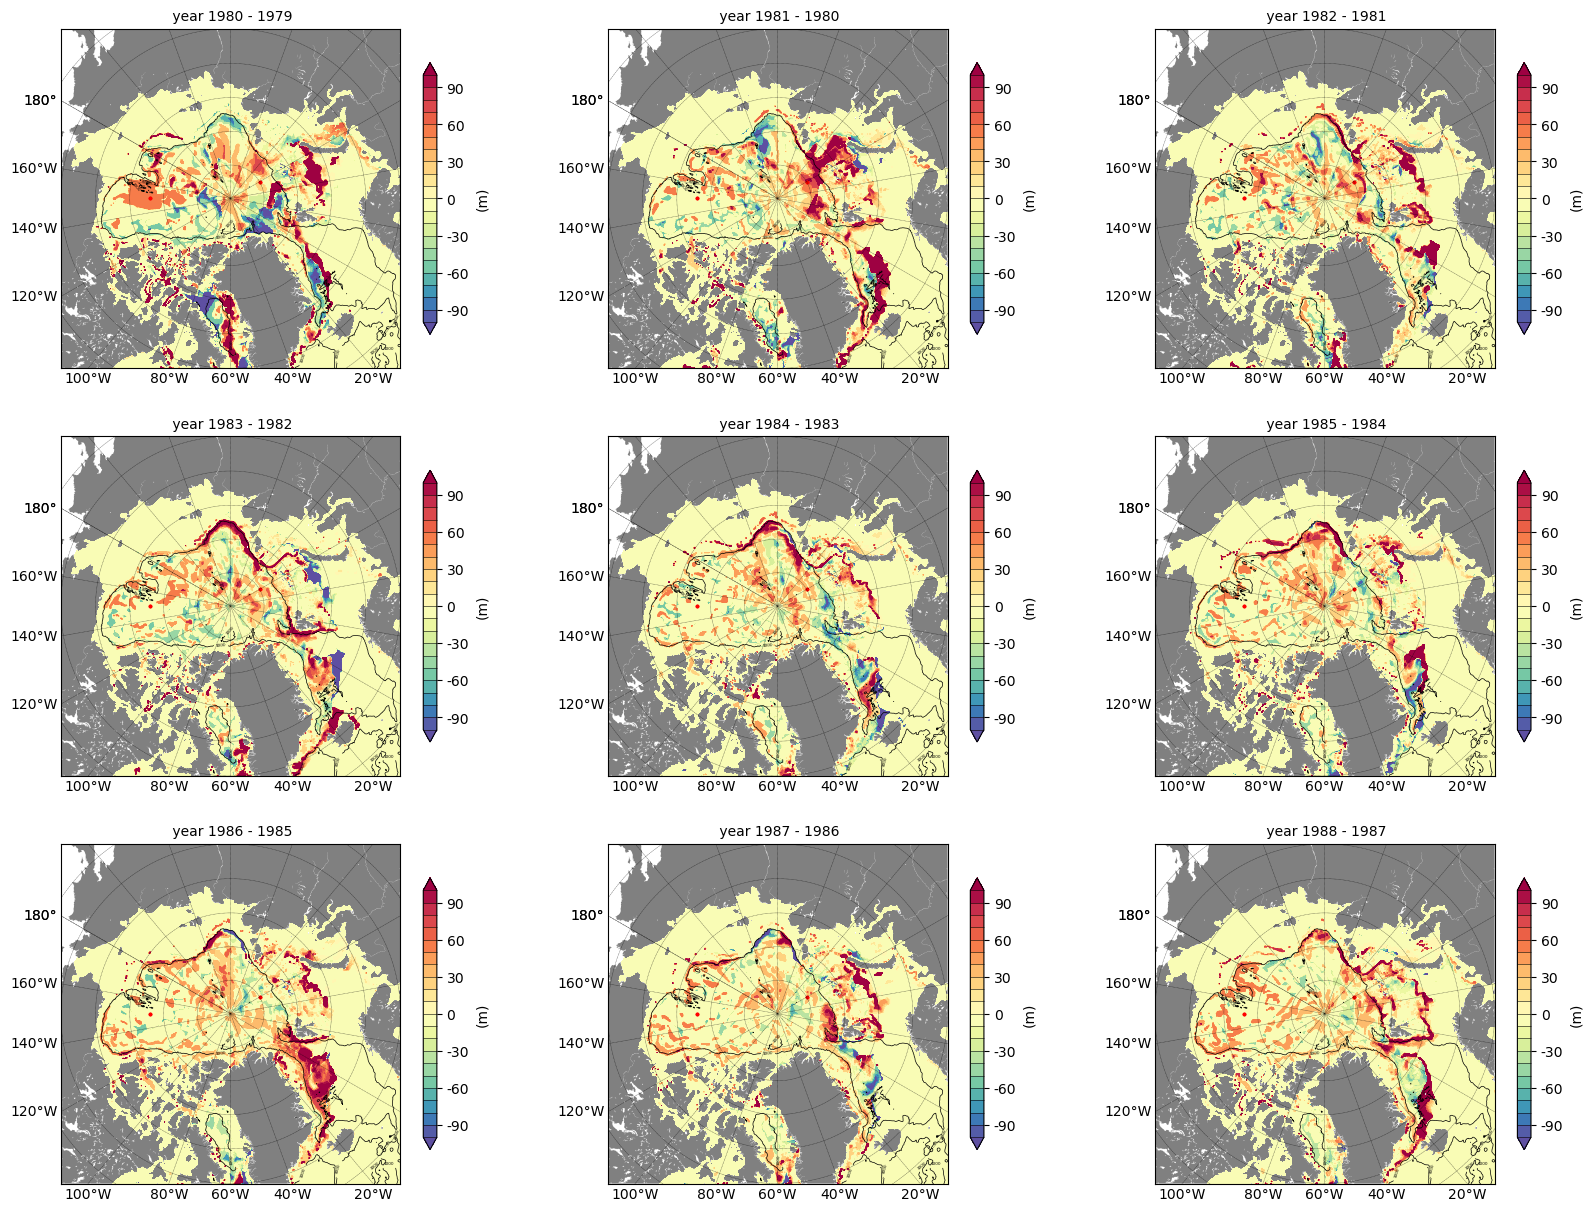

In [55]:
doplot=True
if doplot:
        plt.figure(figsize=(20,15)) 
        #plt.subplot(223)
        ######### AWTmax #########
        my_cblab=r'(m)'
        my_cmap=plt.colormaps['Spectral_r']
        #my_cmap=mpl.cm.get_cmap('Spectral_r')
        #my_cmap=plt.cm.get_cmap('jet')

        m_alpha=1.
        zfile_ext='_AWTmaxDepth'
        vmin=-100. ; vmax=100. ; vint=10.
        contours=np.arange(vmin,vmax+vint,vint)  # optional contours
        limits=[vmin,vmax,vint]                        # limits for eke
        myticks=np.arange(vmin,vmax+vint,vint)   # optional colorbar ticks (None)    
        
        l_lon=ds_AW['lon_mod'].isel(time_counter=0).values
        l_lat=ds_AW['lat_mod'].isel(time_counter=0).values

        y_start=1980 ; 
        faces=9
        for y_start in np.arange(0,5,faces)+y_start:
            for iter in np.arange(faces):
                plt.subplot(331+iter)   
                l_fld=clean_Diff_AWTmaxDepth_mod.sel(time_counter=str(y_start+iter))[:,:,0]
                zoutmap=Arc_Bat(ztype='isol1000')
                ztitle=r' year '+str(y_start+iter)+' - '+str(y_start+iter-1)
                Arc_plot(l_lon,l_lat, l_fld*m_alpha, contours, limits, myticks, \
                         name=ztitle, zmy_cblab=my_cblab, zmy_cmap=my_cmap, zvar='socurl')

            plt.savefig('./FIGURES/CREG025.L75-'+CASE+'_AWTmaxDepthIncrement_y'+str(y_start)+str(y_start+faces-1)+'.png',dpi=300)
    
doplot=False


# Assess surface fluxes in the Eurasian Basin 

In [30]:
def moor_loc(All_box):
    for box in All_box:
            print(box)
            plt.scatter(box['lat_min'],box['lon_min'],3,marker='o', color='r')

In [15]:
#CASE='DFS52NEM405'
CASE='ERA01NEM405'
year=1979
DATA_PATH='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-'+CASE+'-MEAN/5d/'
AW_files = [f for f in fs.glob(DATA_PATH+str(year)+'/'+'CREG025.L75-'+CASE+'_y'+str(year)+'m??.5d_flxT.nc')]                           

1979


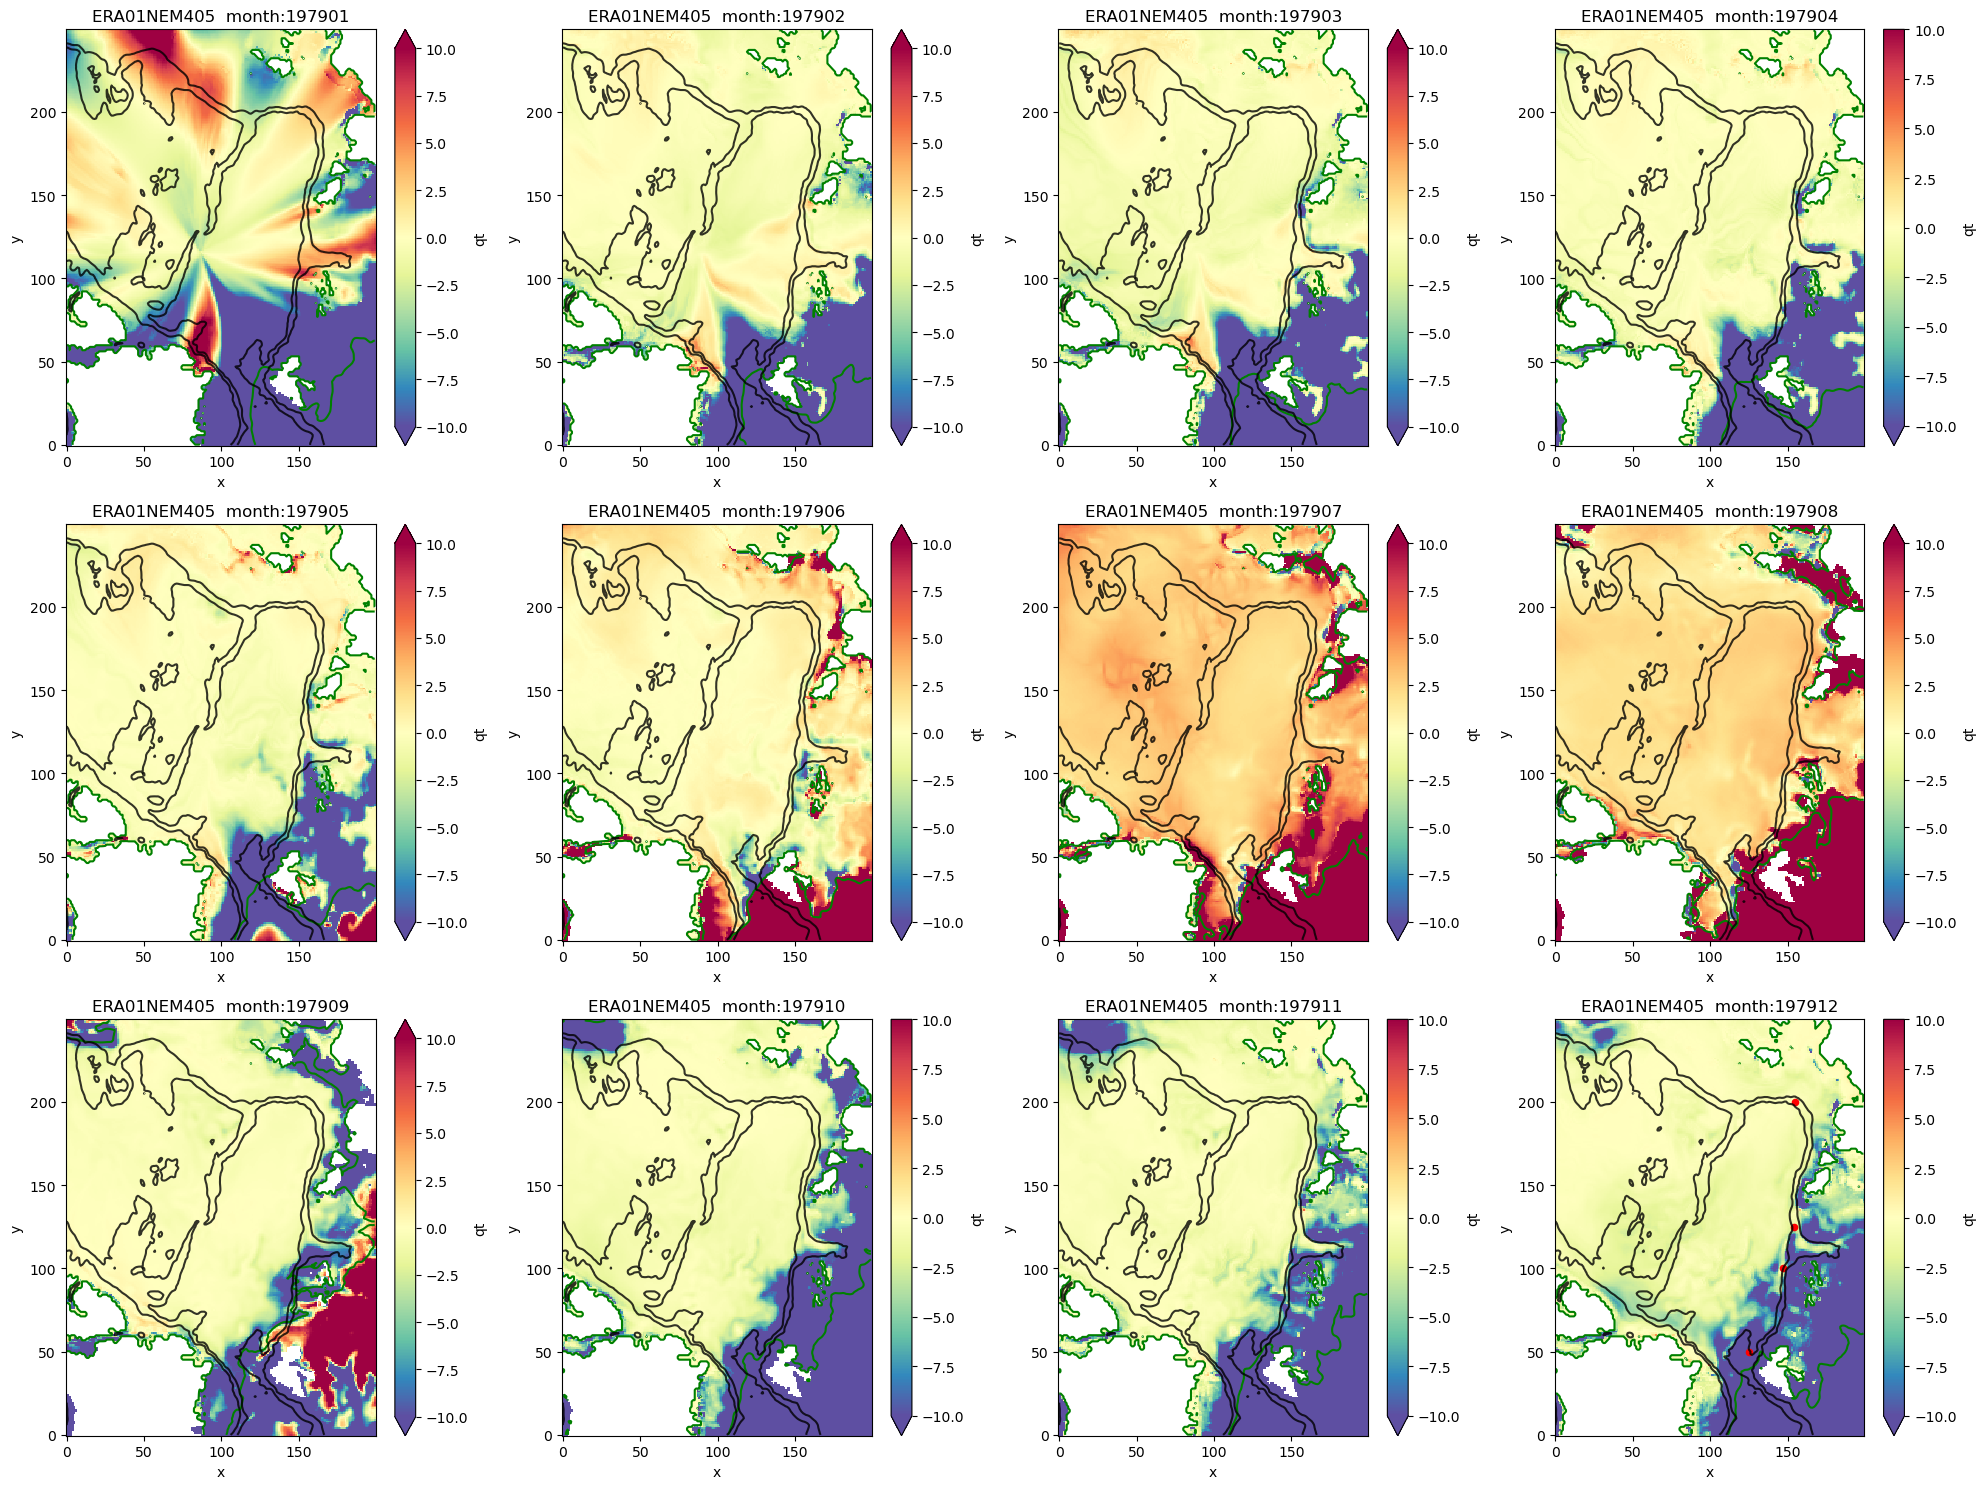

In [48]:
ys=1979 ; ye=1979
for year in set(np.arange(ye-ys+1)+ys): 
    print(year)
    # Read the surface flux
    ds_AW = xr.concat([xr.open_dataset(f) for f in fs.glob(DATA_PATH+str(year)+'/'+'CREG025.L75-'+CASE+'_y'+str(year)+'m??.5d_flxT.nc')],dim='time_counter')
    ds_AW=xr.where(tmask2D == 0., np.nan, ds_AW)
    # Read the ice concentration
    ds_ICE=xr.open_mfdataset(DATA_PATH+str(year)+'/'+'CREG025.L75-'+CASE+'_y'+str(year)+'m??.5d_icemod.nc',concat_dim='time_counter',combine='nested')

    my_min=-10 ; my_max=10.
    fig, axes = plt.subplots(3, 4, figsize=(20,15)) 

    for i, ax in enumerate(axes.flat):
        i+=1 
        if i < 10: 
            mm='0'+str(i) 
        else : 
            mm=str(i)
        ds_AW['qt'].sel(time_counter=str(year)+'-'+mm).isel(y=slice(300,550),x=slice(200,400)).plot(ax=ax,vmin=my_min,vmax=my_max,cmap='Spectral_r')   
        ds_ICE['siconc'].sel(time_counter=str(year)+'-'+mm).isel(y=slice(300,550),x=slice(200,400))[0,:,:].plot.contour(ax=ax,levels=[0.15],colors='g')   
        fieldbat['bathy_meter'].isel(t=0,y=slice(300,550),x=slice(200,400)).plot.contour(ax=ax,levels=[500.,2000.],colors='k',alpha=0.8)
        bx_SVAL={'name':'SVA','lon_min':125,'lon_max':125,'lat_min':50,'lat_max':50}
        bx_BANN={'name':'BAN','lon_min':147,'lon_max':147,'lat_min':100,'lat_max':100}
        bx_AANN={'name':'AAN','lon_min':154,'lon_max':154,'lat_min':125,'lat_max':125}
        bx_LAPT={'name':'LAP','lon_min':155,'lon_max':155,'lat_min':200,'lat_max':200}
        #moor_loc(bx_SVAL)
        All_box=[bx_SVAL,bx_BANN,bx_AANN,bx_LAPT]
        for box in All_box:
            plt.scatter(box['lon_min'],box['lat_min'],20,marker='o', color='r')

        ax.set_title(CASE+'  month:'+str(year)+mm)

    plt.tight_layout()
    plt.savefig('./FIGURES/CREG025.L75-'+CASE+'_Zoom_SurFlx_y'+str(year)+'.png',dpi=300)

# Assess AW vertical structure in the Eurasian Basin 

In [8]:
#CASE='DFS52NEM405'
CASE='ERA01NEM405'
year=1979
DATA_PATH='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-'+CASE+'-MEAN/5d/'
AW_files = [f for f in fs.glob(DATA_PATH+str(year)+'/'+'CREG025.L75-'+CASE+'_y'+str(year)+'m??.5d_gridT.nc')]                           

In [23]:
bx_SVAL={'name':'SVA','lon_min':125,'lon_max':125,'lat_min':50,'lat_max':50}
bx_BANN={'name':'BAN','lon_min':147,'lon_max':147,'lat_min':100,'lat_max':100}
bx_AANN={'name':'AAN','lon_min':154,'lon_max':154,'lat_min':125,'lat_max':125}
bx_LAPT={'name':'LAP','lon_min':155,'lon_max':155,'lat_min':200,'lat_max':200}

1979
compute the AWT max Depth


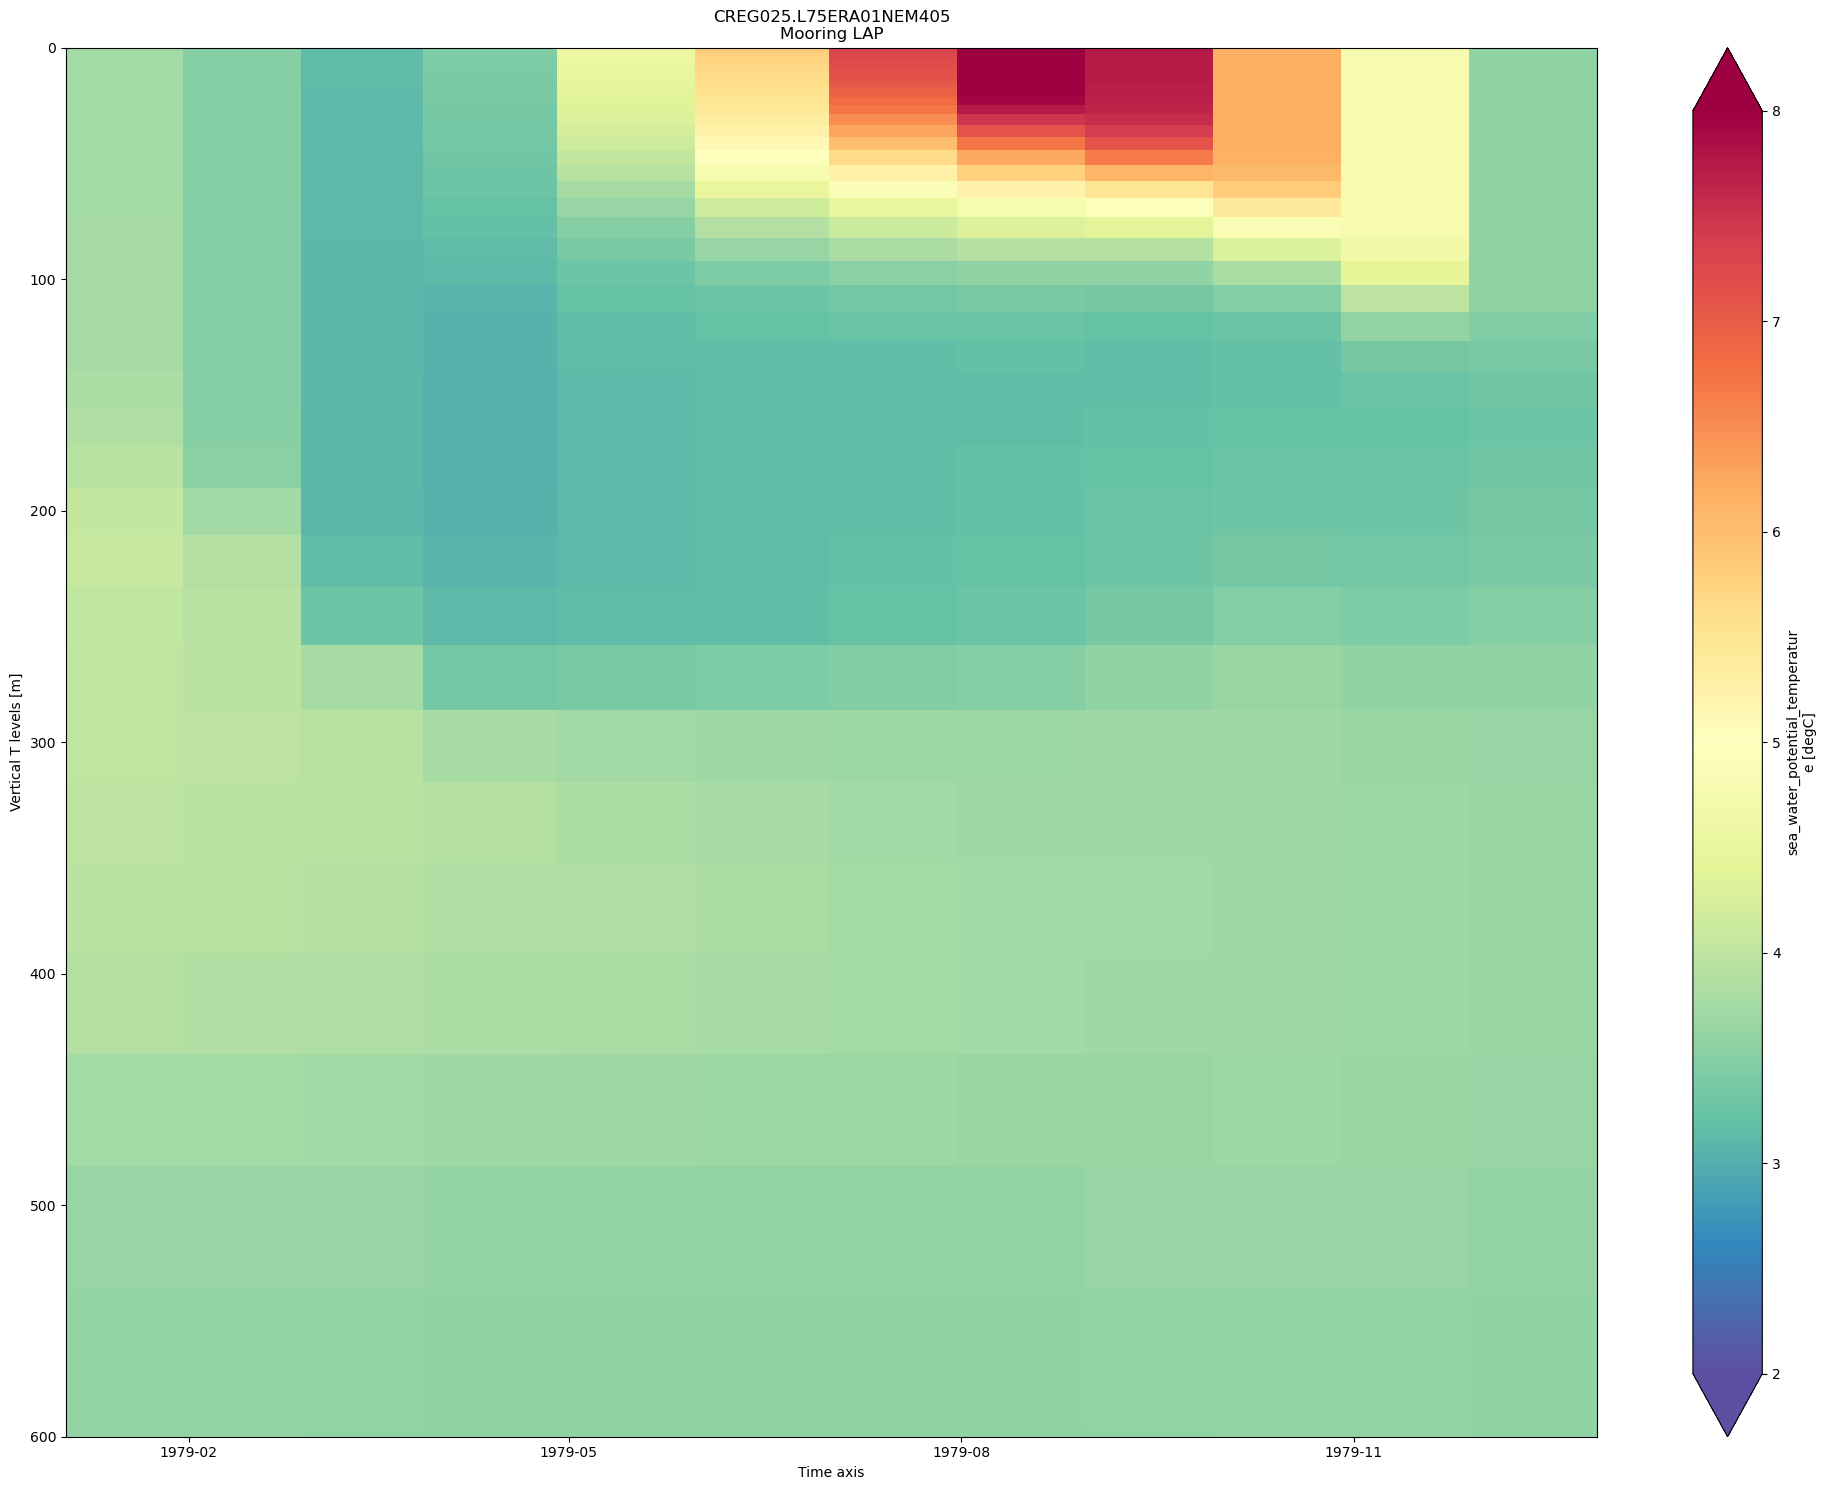

In [30]:
ys=1979 ; ye=1979
for year in set(np.arange(ye-ys+1)+ys): 
    print(year)
    # Read the gridT file
    ds_AW = xr.concat([xr.open_dataset(f) for f in fs.glob(DATA_PATH+str(year)+'/'+'CREG025.L75-'+CASE+'_y'+str(year)+'m??.5d_gridT.nc')],dim='time_counter')

    
    # Compute the AWTmax depth
    print('compute the AWT max Depth')
    if False: 
        vosaline=ds_AW['vosaline']
        votemper=ds_AW['votemper']
        temp_map, depth_map = awtmax_depth(votemper,vosaline,'deptht',np.array(ds_AW['deptht']),ztime=ds_AW.dims['time_counter'], zmask=tmask2D)
    
    plt.figure(figsize=(20,15)) 
    ds_AW['votemper'].isel(y=bx_LAPT['lon_min'],x=bx_LAPT['lat_max']).plot(x='time_counter', y='deptht', \
                                                                           vmin=2.,vmax=8.,cmap='Spectral_r')
#    depth_map.isel(y=bx_LAPT['lon_min'],x=bx_LAPT['lat_max']).plot.scater()
    
    plt.gca().invert_yaxis()  
    plt.ylim([600.,0.])
    plt.title('CREG025.L75'+CASE+'\n'+'Mooring '+bx_LAPT['name'])

#    fig, ax = plt.subplots(212)
#    ds_AW['vosaline'].isel(y=bx_LAPT['lon_min'],x=bx_LAPT['lat_max']).plot(x='time_counter', y='deptht', \
#                                                                           vmin=33.,vmax=35.,cmap='Spectral_r',\
#                                                                           ax=ax)
#    ax.invert_yaxis()
#    ax.ylim([0.,600.])
#    ax.title('CREG025.L75'+CASE+'\n'+'Mooring '+bx_LAPT['name'])

    
    plt.tight_layout()
    #plt.savefig('./FIGURES/CREG025.L75-'+CASE+'_TS_TiSe_Moor'+bx_LAPT['name']+'_y'+str(year)+'.png',dpi=300)

type: unhashable type: 'DatetimeIndex'

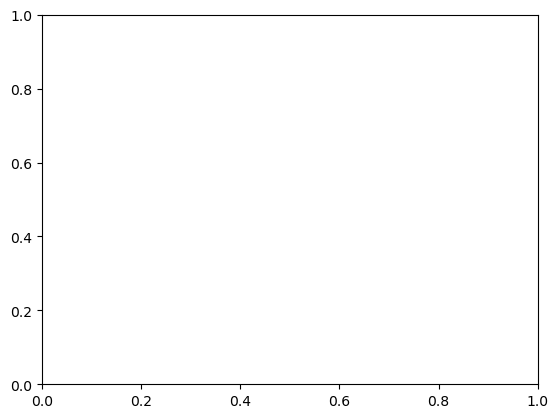

In [28]:
depth_map.isel(y=bx_LAPT['lon_min'],x=bx_LAPT['lat_max']).plot(x=pd.date_range(start='1979-01',end='1979-12',periods=12,normalize=True)
)